import the libraries

Collecting and preparing the data

In [86]:
import numpy as np 
import pandas as pd 
import pandas as pd
#import pandas_profiling
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [87]:
data=pd.read_csv(r"C:\Users\Ganeshvivek Mannam\Downloads\archive (3)\framingham.csv",encoding="iso-8859-1")

In [88]:
#pp.profilereport(data)

In [89]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [90]:
data["target"]=data["TenYearCHD"]

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
 16  target           4238 non-null   int64  
dtypes: float64(9),

In [92]:
data.count()

male               4238
age                4238
education          4133
currentSmoker      4238
cigsPerDay         4209
BPMeds             4185
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4188
sysBP              4238
diaBP              4238
BMI                4219
heartRate          4237
glucose            3850
TenYearCHD         4238
target             4238
dtype: int64

In [93]:
data['male'].head(10)

0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: male, dtype: int64

In [94]:
data.shape

(4238, 17)

In [95]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'target'],
      dtype='object')

Visualizing the data and undestanding some patterns

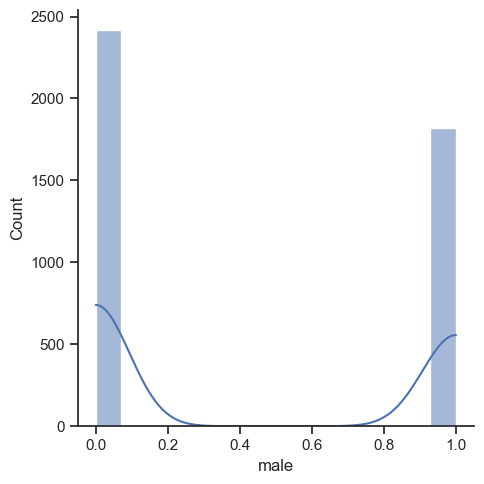

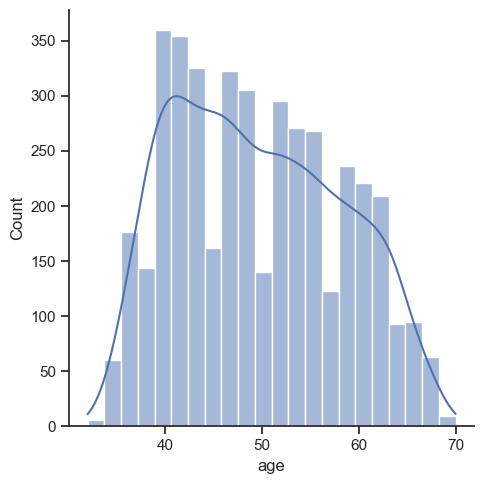

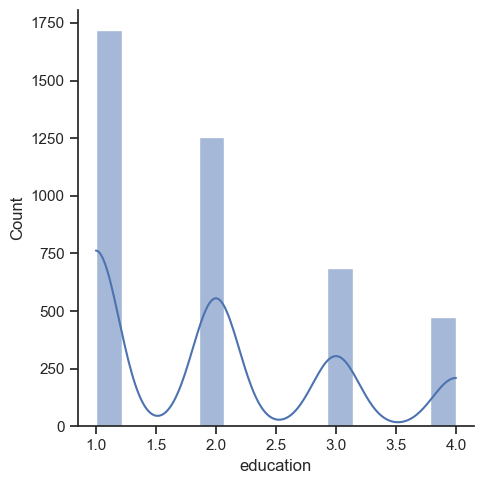

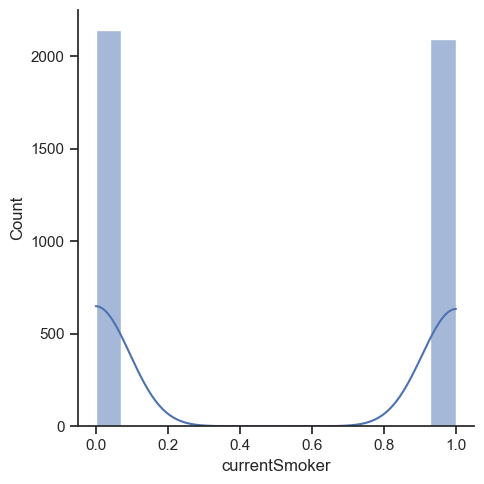

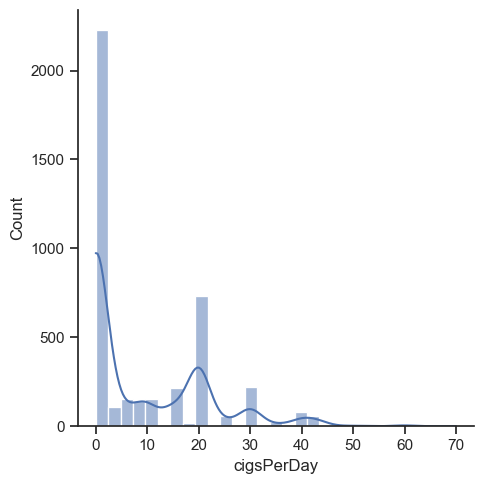

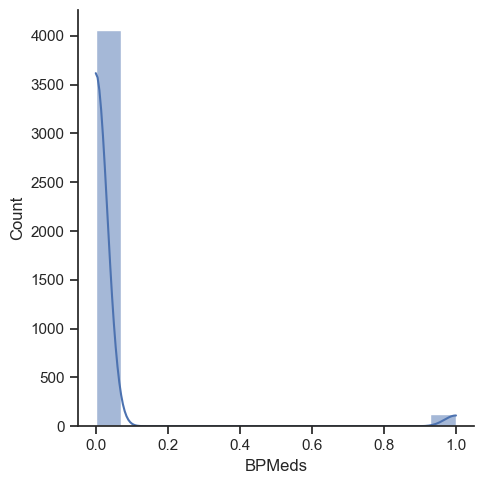

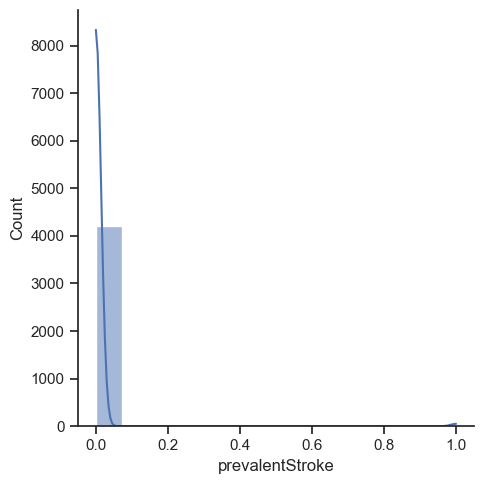

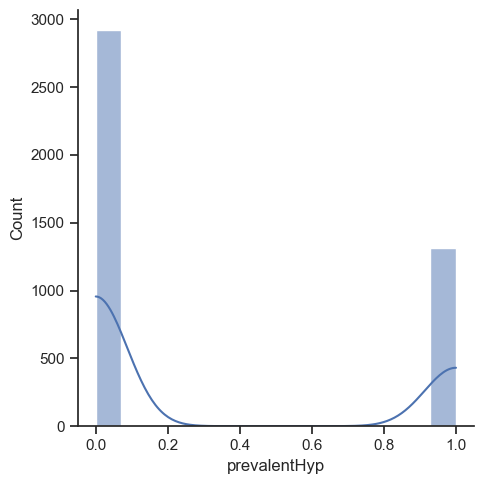

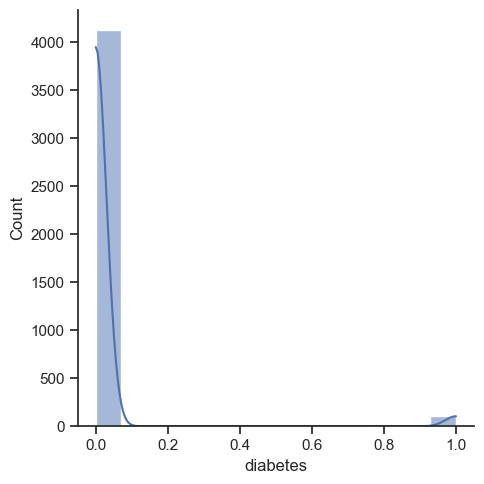

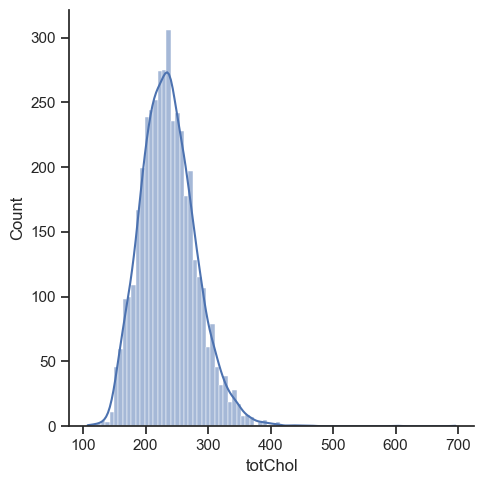

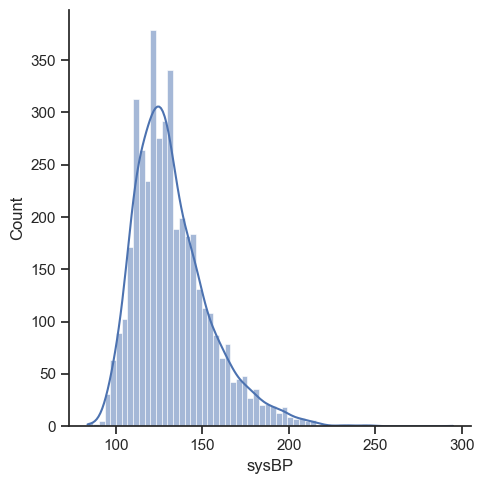

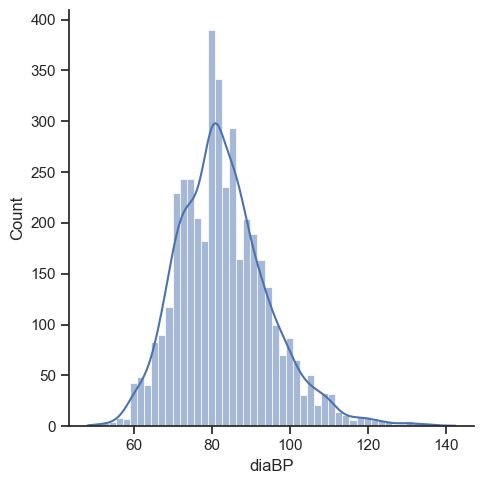

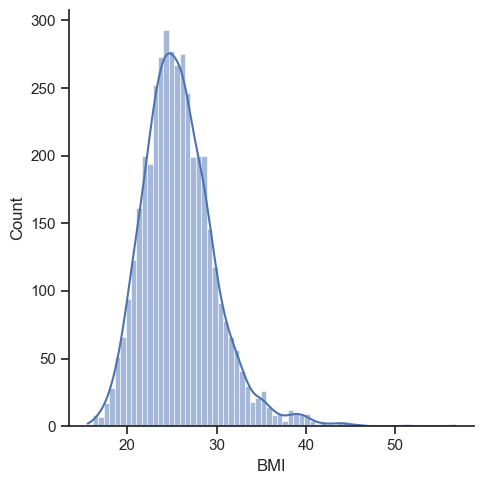

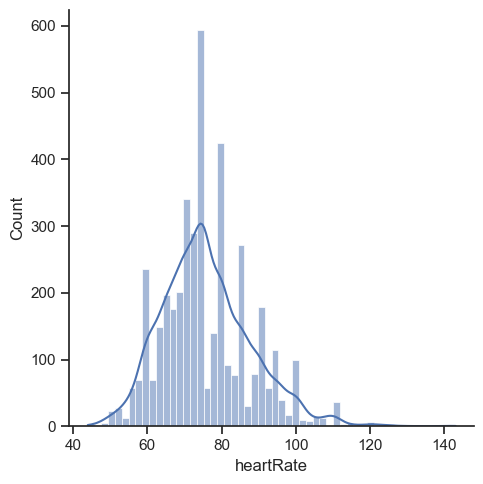

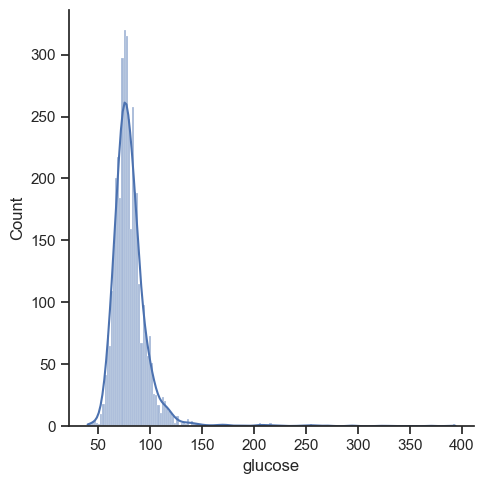

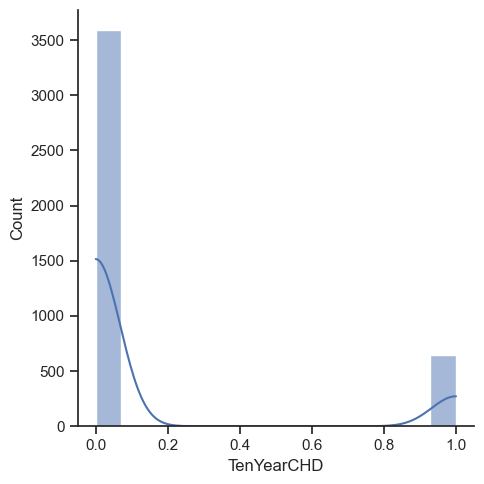

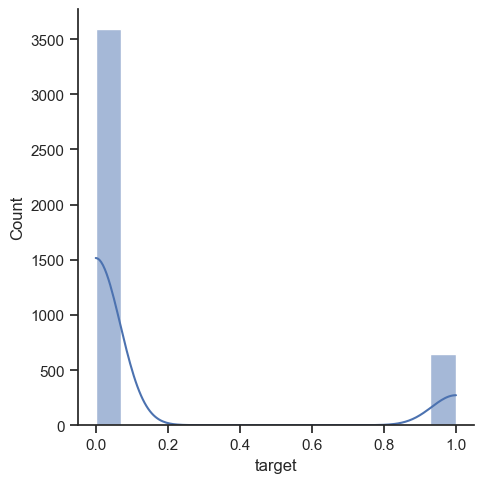

In [97]:
for i in data.columns:
    sns.displot(x=i, data=data, kde=True)
    plt.show()

array([[<AxesSubplot: title={'center': 'male'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>,
        <AxesSubplot: title={'center': 'currentSmoker'}>],
       [<AxesSubplot: title={'center': 'cigsPerDay'}>,
        <AxesSubplot: title={'center': 'BPMeds'}>,
        <AxesSubplot: title={'center': 'prevalentStroke'}>,
        <AxesSubplot: title={'center': 'prevalentHyp'}>],
       [<AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'totChol'}>,
        <AxesSubplot: title={'center': 'sysBP'}>,
        <AxesSubplot: title={'center': 'diaBP'}>],
       [<AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>,
        <AxesSubplot: title={'center': 'glucose'}>,
        <AxesSubplot: title={'center': 'TenYearCHD'}>],
       [<AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: 

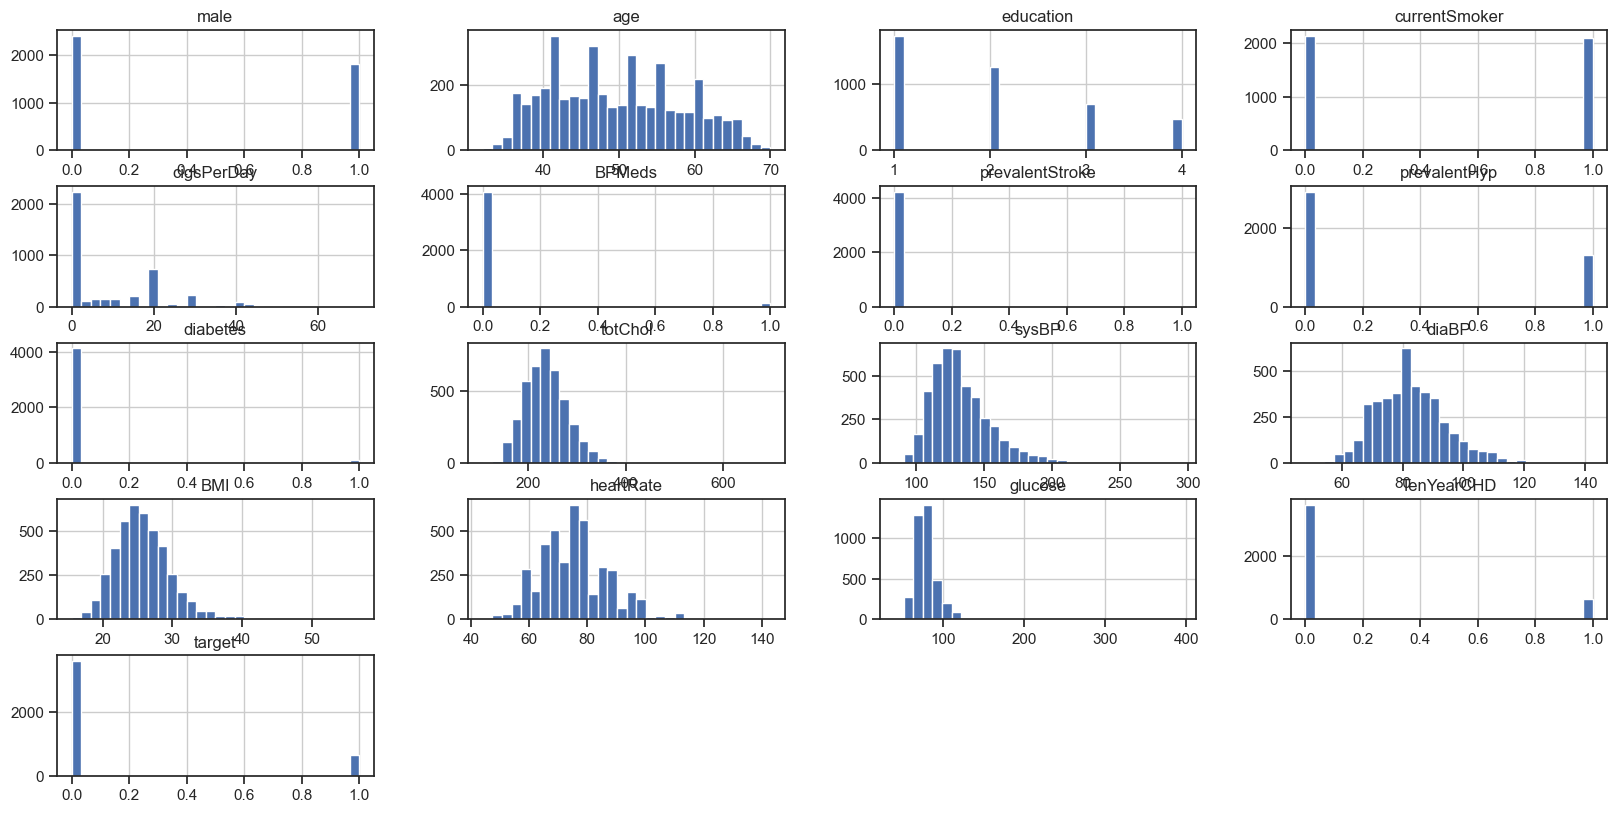

In [98]:
data.hist(bins=30, 
        figsize=(20,30),
        layout=(15,4))

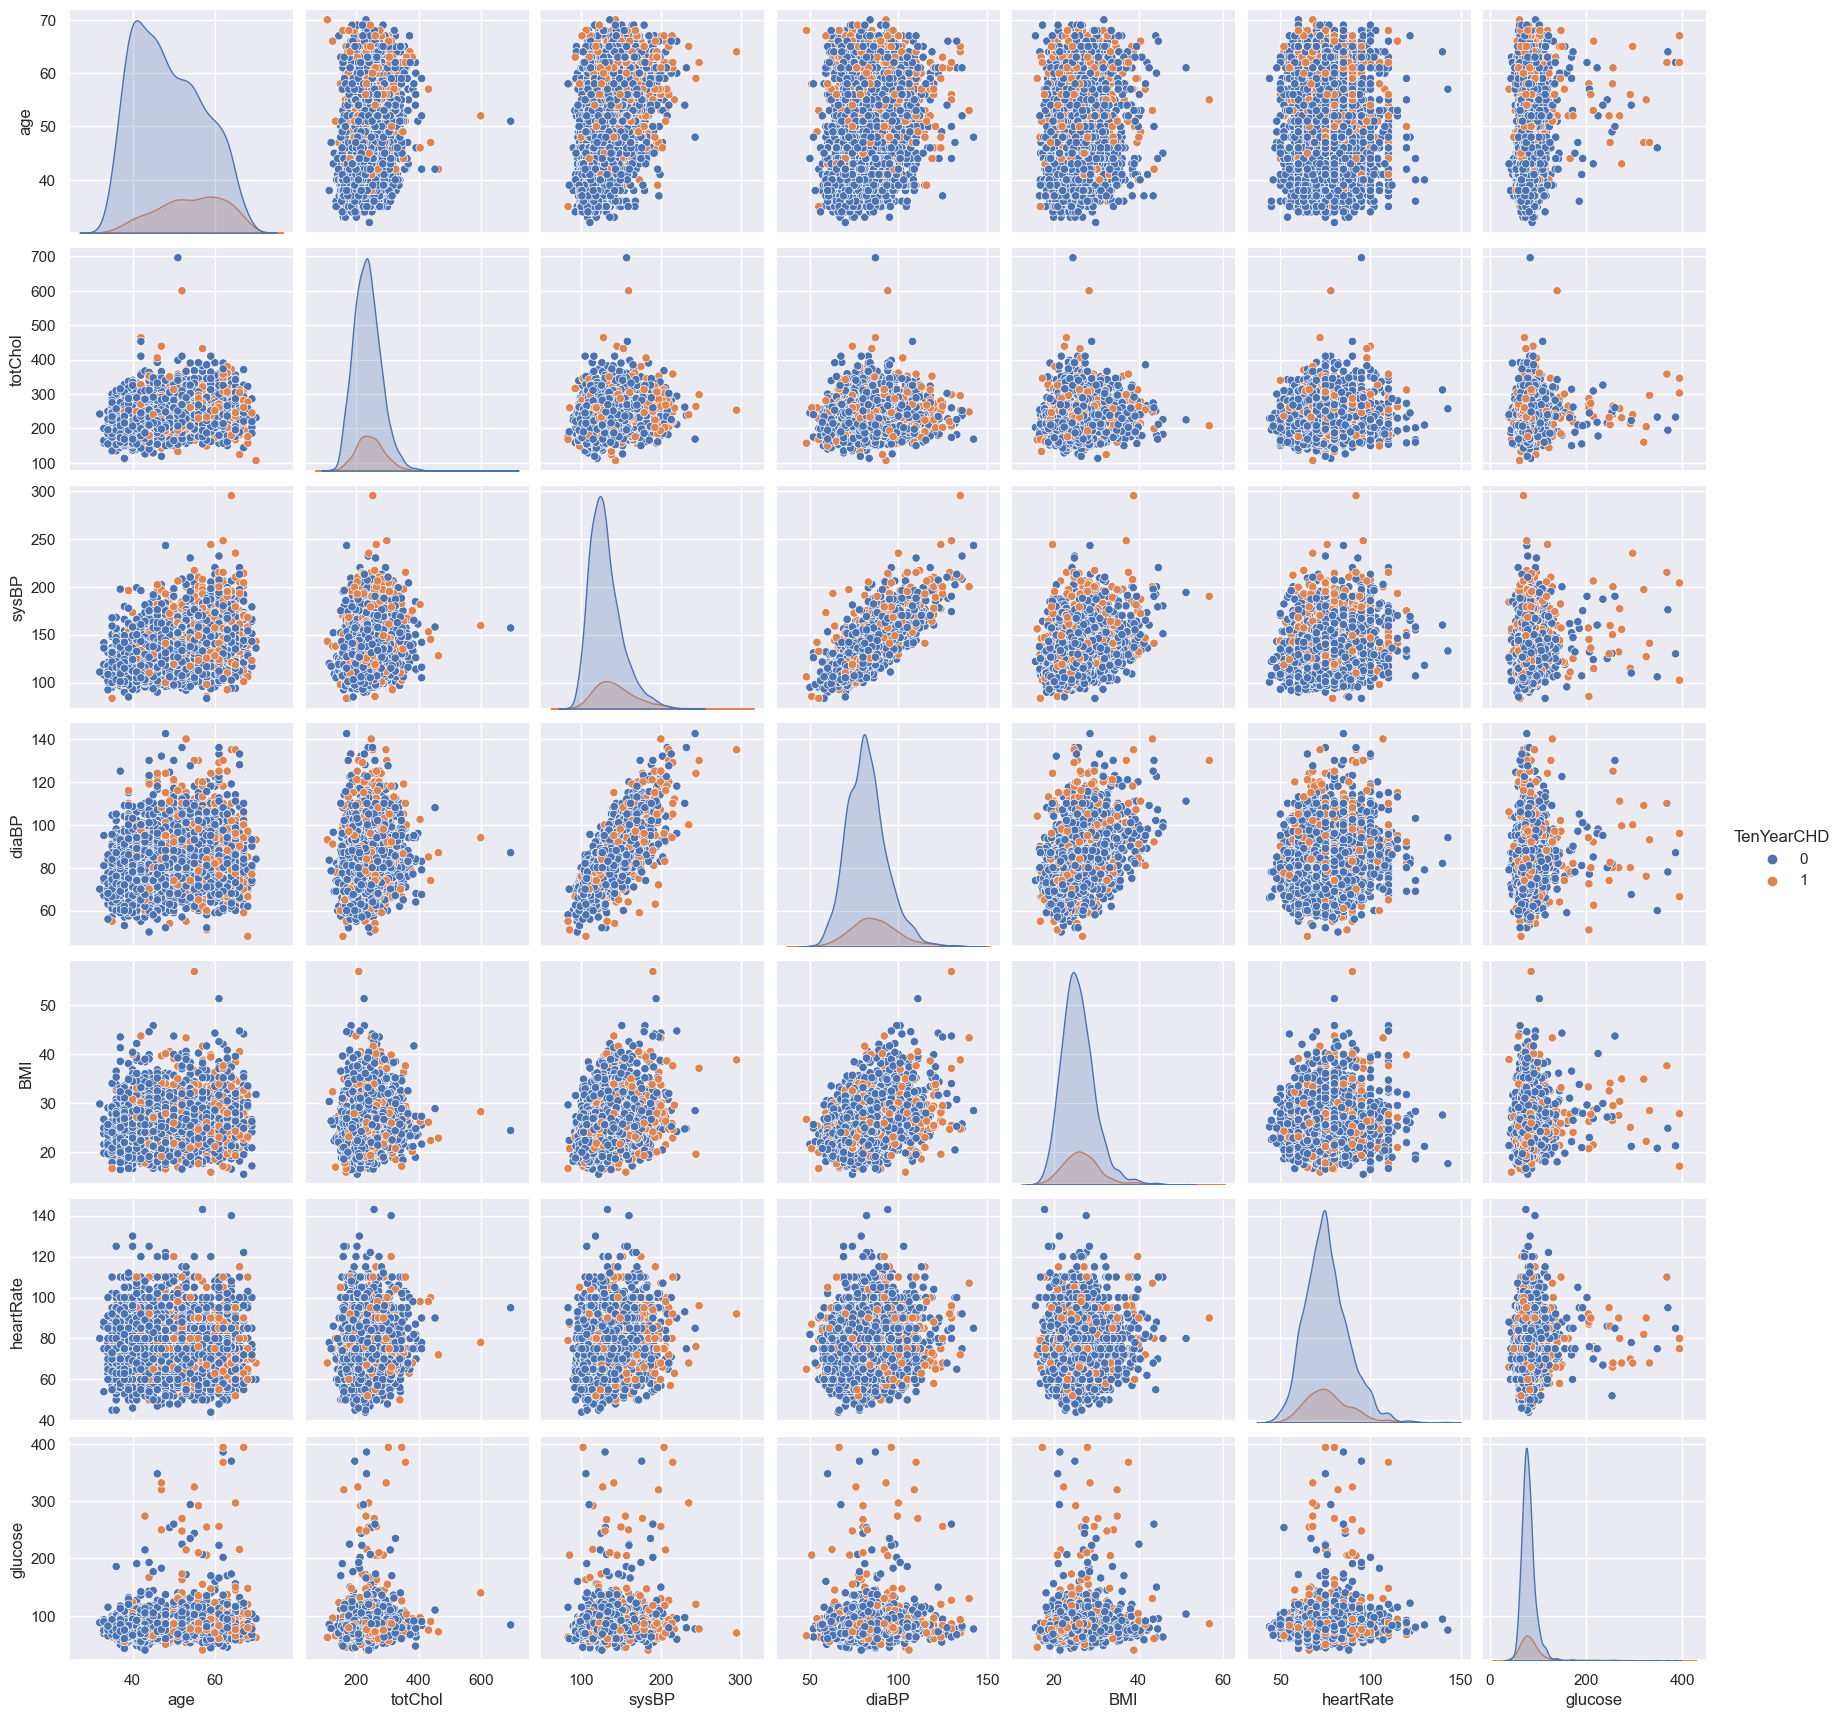

In [146]:
numerical_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
sns.pairplot(data, vars=numerical_features, hue='TenYearCHD')
plt.show()

SNS Heatmap

<AxesSubplot: >

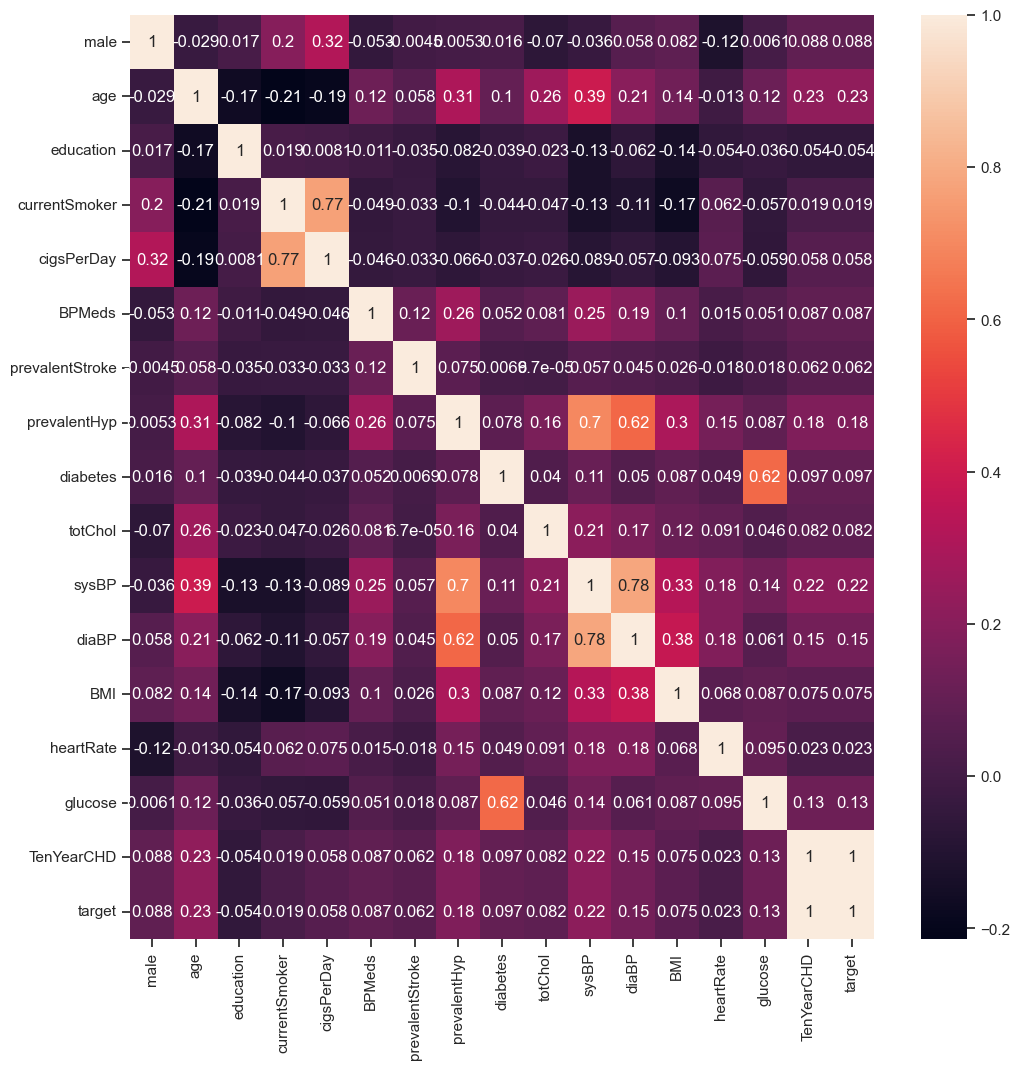

In [101]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

Hear from the graph we can see that age, prevalentHyp, sysBP, diaBP, glucose are highely correlated with Target so we can take these elements to train our model.

In [102]:
data["age"][data["age"]<40].count()

555

<AxesSubplot: xlabel='target', ylabel='count'>

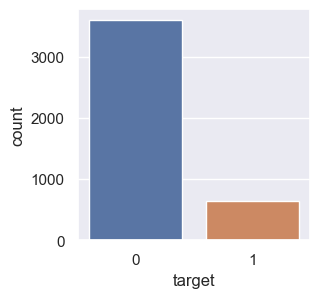

In [103]:
plt.figure(figsize=(3,3))
sns.set_theme()
sns.countplot(data=data,x='target')

In [104]:
data["target"].value_counts()

0    3594
1     644
Name: target, dtype: int64

In [105]:
X=data[['age','prevalentHyp','sysBP','diaBP','glucose']]
Y=data["target"]

In [106]:
X

,age,prevalentHyp,sysBP,diaBP,glucose
0,39,0,106.0,70.0,77.0
1,46,0,121.0,81.0,76.0
2,48,0,127.5,80.0,70.0
3,61,1,150.0,95.0,103.0
4,46,0,130.0,84.0,85.0
...,...,...,...,...,...
4233,50,1,179.0,92.0,86.0
4234,51,0,126.5,80.0,68.0
4235,48,0,131.0,72.0,86.0
4236,44,0,126.5,87.0,NaN


filling null values of glucose using mean

In [107]:
X['glucose'] = X['glucose'].fillna(value=data['glucose'].mean())

C:\Users\Ganeshvivek Mannam\AppData\Local\Temp\ipykernel_26984\1451280967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['glucose'] = X['glucose'].fillna(value=data['glucose'].mean())


Feature scaling

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['sysBP','diaBP','glucose']
X_Scaled = X.copy()
X_Scaled[columns_to_scale]  = scaler.fit_transform(X[columns_to_scale])

In [109]:
X_Scaled

,age,prevalentHyp,sysBP,diaBP,glucose
0,39,0,-1.195907,-1.082625,-0.217517
1,46,0,-0.515187,-0.158988,-0.261311
2,48,0,-0.220209,-0.242955,-0.524078
3,61,1,0.800871,1.016549,0.921141
4,46,0,-0.106755,0.092912,0.132840
...,...,...,...,...,...
4233,50,1,2.116930,0.764648,0.176634
4234,51,0,-0.265590,-0.242955,-0.611667
4235,48,0,-0.061374,-0.914691,0.176634
4236,44,0,-0.265590,0.344813,0.000000


Removing the outliers using z-score

In [110]:
from scipy import stats
df=X_Scaled

def remove_outliers_zscore(df, threshold=2):
    z_scores = np.abs(stats.zscore(df))
    outliers = (z_scores > threshold).all(axis=1)
    return df[~outliers]

threshold = 3 
X_cleaned = remove_outliers_zscore(df, threshold)
X_cleaned


,age,prevalentHyp,sysBP,diaBP,glucose
0,39,0,-1.195907,-1.082625,-0.217517
1,46,0,-0.515187,-0.158988,-0.261311
2,48,0,-0.220209,-0.242955,-0.524078
3,61,1,0.800871,1.016549,0.921141
4,46,0,-0.106755,0.092912,0.132840
...,...,...,...,...,...
4233,50,1,2.116930,0.764648,0.176634
4234,51,0,-0.265590,-0.242955,-0.611667
4235,48,0,-0.061374,-0.914691,0.176634
4236,44,0,-0.265590,0.344813,0.000000


In [111]:
X=X_cleaned

In [112]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: target, Length: 4238, dtype: int64

In [113]:
X.isnull().sum()

age             0
prevalentHyp    0
sysBP           0
diaBP           0
glucose         0
dtype: int64

heart diseases in the age group above 40

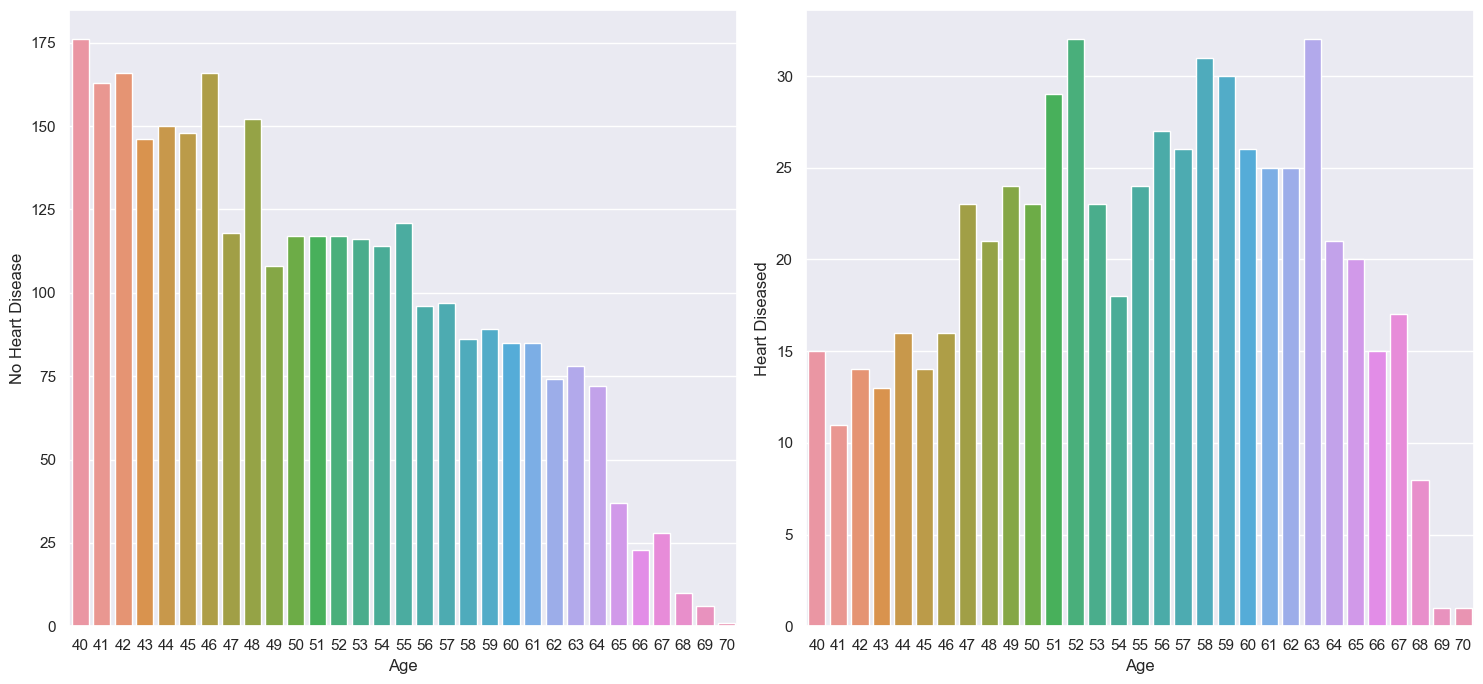

In [147]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

sns.countplot(x='age', data=data[(data['age'] >= 40) & (data['target'] == 0)], ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('No Heart Disease')

sns.countplot(x='age', data=data[(data['age'] >= 40) & (data['target'] == 1)], ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Heart Diseased')

plt.tight_layout()
plt.show()

Model training

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,stratify=Y,random_state=57)

In [115]:
print(X.shape,X_train.shape,X_test.shape)

(4238, 5) (2825, 5) (1413, 5)


Method 1: Logistic regression

In [117]:
model = LogisticRegression(max_iter=500)

trainning the LogisticRegression with training data

In [118]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

accuracy for trainning data

In [119]:
Y_train_prediction=model.predict(X_train)
training_data_acc= accuracy_score(Y_train_prediction,Y_train)
print("Accuracy score on training data: ",training_data_acc)

Accuracy score on training data:  0.8502654867256637


accuracy on testing data

In [120]:
Y_test_predicition=model.predict(X_test)
test_data_acc= accuracy_score(Y_test_predicition,Y_test)
print("Accuracy score on test data: ",test_data_acc)

Accuracy score on test data:  0.8492569002123143


In [121]:
cross_val_score(model,X,Y,cv=10,scoring='accuracy').mean()

0.8499286319639591

confusion matrix

Confusion matrix:
TP NP
TF NF
Accuracy: The ratio of correct predictions (TP + TN) to the total number of predictions (TP + TN + FP + FN).
Precision: The ratio of true positives (TP) to the total number of positive predictions (TP + FP). It measures the model's ability to avoid false positive predictions
Recall (Sensitivity or True Positive Rate): The ratio of true positives (TP) to the total number of actual positives (TP + FN). It measures the model's ability to identify all positive instances.
F1-Score: The harmonic mean of precision and recall. It provides a balanced measure of precision and recall.
Specificity (True Negative Rate): The ratio of true negatives (TN) to the total number of actual negatives (TN + FP). It measures the model's ability to identify all negative instances.

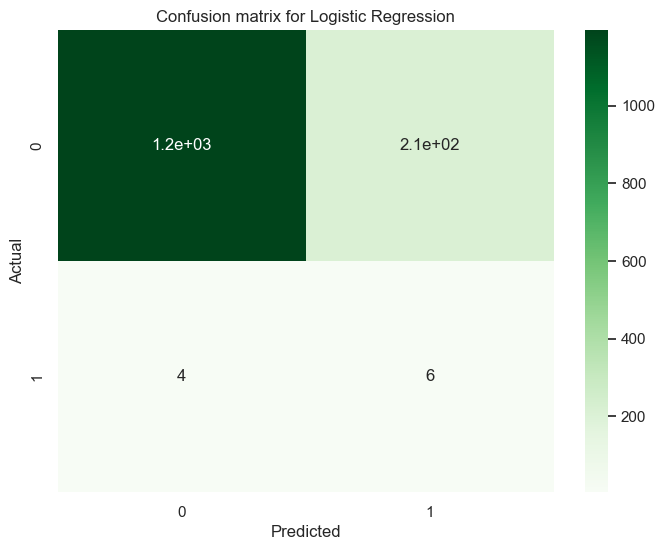

In [122]:
cm = confusion_matrix(Y_test_predicition,Y_test)
plt.figure(figsize =(8,6))
sns.heatmap(cm,annot=True,cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

classification matrix

In [123]:
print(classification_report(Y_test,Y_test_predicition))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1198
           1       0.60      0.03      0.05       215

    accuracy                           0.85      1413
   macro avg       0.73      0.51      0.49      1413
weighted avg       0.81      0.85      0.79      1413



Method2:Support vector machines

In [124]:
svc= SVC(kernel='linear',C=1)

# Train the model on the training data
svc.fit(X_train, Y_train)

# Make predictions on the testing data
svc_y_pred = svc.predict(X_test)

# Make predictions on the training data
svc_y_pred1 = svc.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(Y_test, svc_y_pred)
print("Accuracy of testing data in SVM :", accuracy)

Accuracy of testing data in SVM : 0.8478414720452937


Confusion matrix

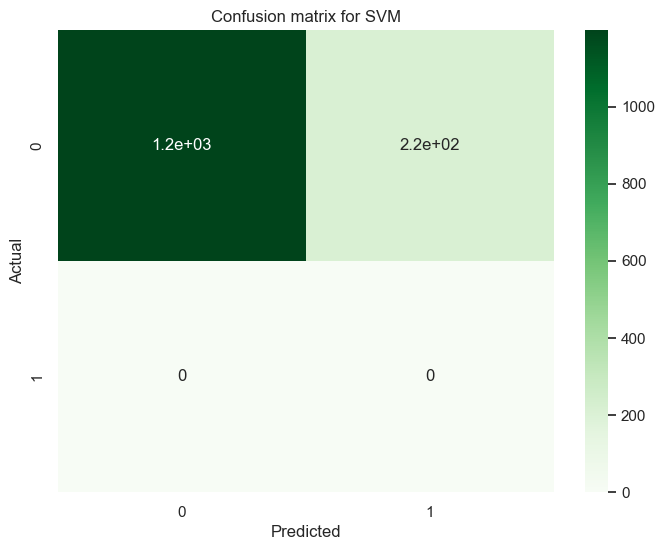

In [125]:
cm = confusion_matrix(svc_y_pred,Y_test)
plt.figure(figsize =(8,6))
sns.heatmap(cm,annot=True,cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for SVM')
plt.show()

Classification report

In [126]:
print(classification_report(Y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1198
           1       0.00      0.00      0.00       215

    accuracy                           0.85      1413
   macro avg       0.42      0.50      0.46      1413
weighted avg       0.72      0.85      0.78      1413



c:\Users\Ganeshvivek Mannam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ganeshvivek Mannam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ganeshvivek Mannam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

Method 3: Random forest 

In [127]:
RF = RandomForestClassifier(100)
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [128]:
RF_y_pred = RF.predict(X_test)

In [129]:
accuracy = accuracy_score(Y_test, RF_y_pred)
print('Accuracy in Random Forest:', accuracy)

Accuracy in Random Forest: 0.8294409058740269


In [130]:
cross_val_score(RF,X,Y,cv=10,scoring='accuracy').mean()

0.8362426959275615

Confusion matrix

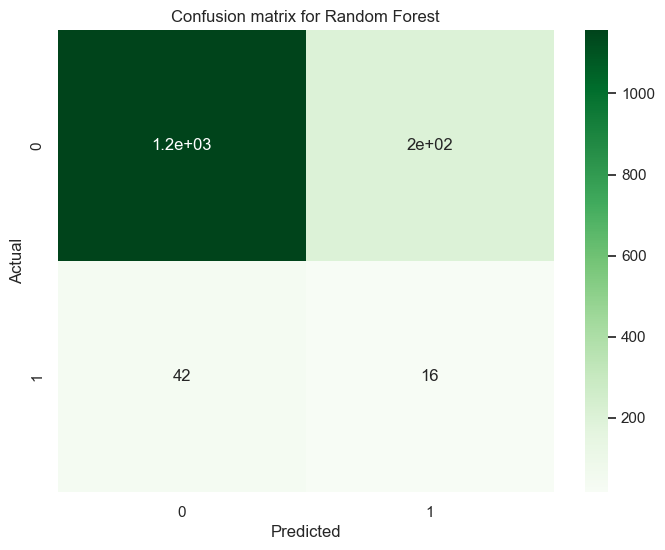

In [131]:
cm = confusion_matrix(RF_y_pred,Y_test)
plt.figure(figsize =(8,6))
sns.heatmap(cm,annot=True,cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Random Forest')
plt.show()

Classification

In [132]:
print(classification_report(Y_test,RF_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1198
           1       0.28      0.07      0.12       215

    accuracy                           0.83      1413
   macro avg       0.56      0.52      0.51      1413
weighted avg       0.77      0.83      0.79      1413



Cross_validation  on test data

In [133]:
RF.score(X_test, Y_test)

0.8294409058740269

Method 4: k- nearest neighbors

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Use GridSearchCV to find the best 'k' value
grid_search = GridSearchCV(knn, param_grid, cv=5)  # cv is the number of cross-validation folds
grid_search.fit(X_train, Y_train)  # X_train contains feature data, y_train contains target variable

# Get the best 'k' value from the search
best_k = grid_search.best_params_['n_neighbors']
best_k

15

In [135]:

k=15
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
Y_knn_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_knn_pred)
print('Accuracy in KNeighboursClassifier:', accuracy)

Accuracy in KNeighboursClassifier: 0.8478414720452937


In [136]:
cross_val_score(knn,X,Y,scoring='accuracy').mean()

0.84474031543071

Predictive system

In [137]:
input=(45,0,100,71,79)

input_num=np.asarray(input)
input_num=input_num.reshape(1,-1)

In [138]:
predict=RF.predict(input_num)
print(predict)

[1]


c:\Users\Ganeshvivek Mannam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [139]:
if(predict==1): print("Person got a heart disease")
else: print("Person does not have a heart disease")

Person got a heart disease


In [140]:
import joblib
import pickle
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

joblib.dump(model, 'D:\Programming\eda\hello.pkl')


['D:\\Programming\\eda\\hello.pkl']

In [141]:
import tkinter as tk
from tkinter import Label, Entry, Button, messagebox
import numpy as np
import joblib  
from sklearn.linear_model import LogisticRegression

window = tk.Tk()
window.title("Heart Disease Prediction")

labels = ["Age:", "Prevalent Hypertension (0 or 1):", "Systolic Blood Pressure(HIGH):", "Diastolic Blood Pressure(LOW):", "Glucose Level:"]
entries = []

for label_text in labels:
    label = Label(window, text=label_text)
    label.pack()
    entry = Entry(window)
    entry.pack()
    entries.append(entry)

def predict_heart_disease():
    try:
        input_data = [float(entry.get()) for entry in entries]

        model = joblib.load('hello.pkl')  # Replace with your model file name

        prediction = model.predict([input_data])

        if prediction == 1:
            result_label.config(text="Person has heart disease")
        else:
            result_label.config(text="Person does not have heart disease")

    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for all fields.")

predict_button = Button(window, text="Predict", command=predict_heart_disease)
predict_button.pack()

result_label = Label(window, text="")
result_label.pack()

window.mainloop()